# Classificação com Gradient Boosting
Treine um modelo de Gradient Boosting no conjunto de dados Breast Cancer. Compare o desempenho utilizando a métrica ROC-AUC e a curva ROC.

Autor: Jardson Alves Ribeiro

In [22]:
# Importado as bibliotecas necessárias.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [25]:
# Importado o arquivo csv.
dataset = pd.read_csv('/content/Breast_cancer_data.csv', encoding='utf-8')

In [26]:
# Exibindo as 10 primeiras linhas do dataset.
dataset.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [27]:
# Definindo as features de classe para o modelo.
features, classe = dataset.drop(['diagnosis'], axis=1), dataset['diagnosis']

In [28]:
# Separando os dados de treinamento.
features_treino, features_validacao, classe_treino, classe_validacao = train_test_split(features, classe, test_size=0.30)

In [29]:
# Treinando o modelo GradientBoosting.
modelo_GB = GradientBoostingClassifier()
modelo_GB.fit(features_treino, classe_treino)

GradientBoostingClassifier()

In [30]:
# Fazendo a predição com o conjunto de dados de validação.
classe_predicao = modelo_GB.predict(features_validacao)

In [31]:
# Calculando o ROC AUC.
roc_auc = roc_auc_score(classe_validacao, classe_predicao)
print(f'ROC AUC Score: {roc_auc:.4f}')

ROC AUC Score: 0.9146


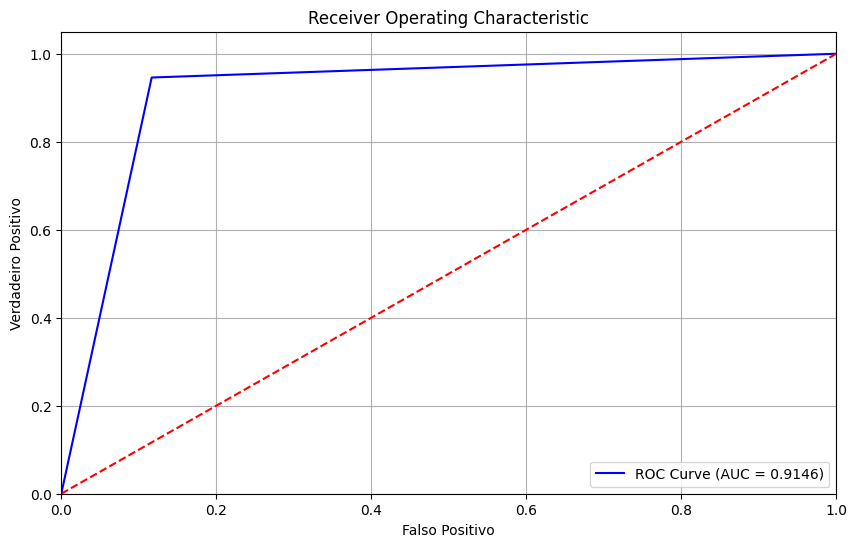

In [32]:
# Criando o gráfico da curva de ROC.
fpr, tpr, thresholds = roc_curve(classe_validacao, classe_predicao)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()